In [32]:
import pandas as pd

# upload csv file
data = pd.read_csv(r'C:\Users\User\Desktop\spam_ham_dataset.csv', encoding='latin-1')
# examine the first few columns of the data structure
print(data.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [33]:
print(data.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [34]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np

# Boş değerleri kontrol et
print(data.isnull().sum())  # Her sütundaki boş veri sayısını göster

# Boş satırları temizle
data.dropna(inplace=True)

# Gereksiz sütunu kaldır (Unnamed: 0 gibi)
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# Temizlenen veri setini tekrar kontrol edelim
print(data.isnull().sum())  # Şimdi boş veri olmamalı
print(data.head())  # İlk 5 satırı tekrar görelim

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64
label        0
text         0
label_num    0
dtype: int64
  label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs\r\nthis deal is t...          0


In [35]:
import re

def clean_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Sayıları ve özel karakterleri kaldır
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Kelimeleri ayır ve geri döndür
    tokens = text.split()
    return " ".join(tokens)

data["text_cleaned"] = data["text"].apply(clean_text)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

# Veri kümesini yükleyelim
data = pd.read_csv(r'C:\Users\User\Desktop\spam_ham_dataset.csv')  # Burada dosya adınızı belirtin

# Text sütununu alalım (veri setinden)
texts = data['text']  # text sütunundaki veriler

# 1. Adım: CountVectorizer ile kelime sayımlarını al
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(texts)

# 2. Adım: TF-IDF'yi hesaplamak için TfidfTransformer kullan
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

# Sonuçları görelim
print("Count Vectorizer Output:\n", X_count.toarray())
print("\nTF-IDF Output:\n", X_tfidf.toarray())

# Kelime isimlerini görmek için
print("\nKelime İsimleri:", count_vectorizer.get_feature_names_out())

Count Vectorizer Output:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

TF-IDF Output:
 [[0.09947426 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Kelime İsimleri: ['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']


In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Veri kümesini yükleyelim (kendi dosya yolunuza göre değiştirin)
data = pd.read_csv(r'C:\Users\User\Desktop\spam_ham_dataset.csv')

# Hedef değişkeni (etiketleri) y olarak tanımlayalım
y = data['label']  # 'label' sütunu örneğin spam/ham etiketlerini içeriyor

# LabelEncoder ile etiketleri dönüştürelim
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # "spam" -> 1, "ham" -> 0 dönüşümü

# Sonuçları görelim
print(f"Önceki Etiketler:\n{y.head()}")
print(f"Dönüştürülmüş Etiketler:\n{y_encoded[:5]}")  # İlk 5 örneği göster

Önceki Etiketler:
0     ham
1     ham
2     ham
3    spam
4     ham
Name: label, dtype: object
Dönüştürülmüş Etiketler:
[0 0 0 1 0]


In [38]:
import re
import numpy as np
from sklearn.model_selection import train_test_split

# Metin temizleme fonksiyonu (NLTK olmadan)
def clean_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = re.sub(r'\d+', '', text)  # Sayıları kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\s+', ' ', text).strip()  # Gereksiz boşlukları kaldır
    return text

# Eğer `text_cleaned` sütunu yoksa, oluşturalım
if "text_cleaned" not in data.columns:
    data["text_cleaned"] = data["text"].apply(clean_text)

# Özellikleri ve etiketleri ayır
X = np.array(data["text_cleaned"])
y = np.array(data["label_num"])  # Eğer etiketler sayısal hale getirildiyse

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 4136
Test seti boyutu: 1035


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Veriyi liste formatına çevir ve her satırı string yap
X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

# TF-IDF vektörizeri
tfidf = TfidfVectorizer(max_features=5000)

# Eğitim verisini fit et ve dönüştür
X_train_tfidf = tfidf.fit_transform(X_train).toarray()

# Test verisini sadece dönüştür
X_test_tfidf = tfidf.transform(X_test).toarray()


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM modelini oluştur ve eğit
svm_model = SVC(kernel='linear', C=1.0)  # Lineer kernel kullanıyoruz
svm_model.fit(X_train_tfidf, y_train)

# Tahmin yap
y_pred = svm_model.predict(X_test_tfidf)

# Sonuçları değerlendir
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.4f}")
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı: 0.9884
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



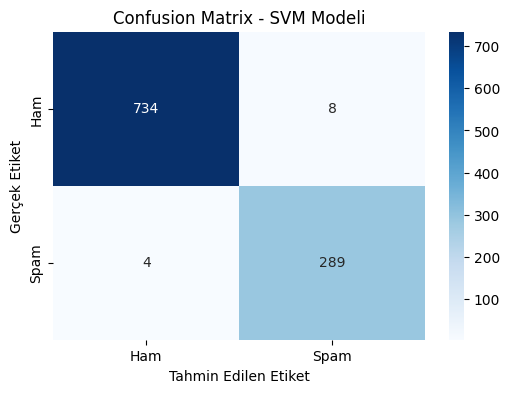

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Confusion Matrix - SVM Modeli")
plt.show()

In [42]:
print(data.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num', 'text_cleaned'], dtype='object')


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Confusion Matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# TP, TN, FP, FN değerlerini al
TN, FP, FN, TP = cm.ravel()

# Ölçütleri hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Duyarlılık (Sensitivity)
specificity = TN / (TN + FP)  # Özgüllük
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdır
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Hassasiyet (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall - Sensitivity): {recall:.4f}")
print(f"Özgüllük (Specificity): {specificity:.4f}")
print(f"F1 Skoru: {f1:.4f}")

Doğruluk (Accuracy): 0.9884
Hassasiyet (Precision): 0.9731
Duyarlılık (Recall - Sensitivity): 0.9863
Özgüllük (Specificity): 0.9892
F1 Skoru: 0.9797


In [ ]:
#roc curve, testing the predictions can be added